<a href="https://colab.research.google.com/github/kirankumar9972/kirankumar_playstore-reviews/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import pandas as pd # data manipulation
import numpy as np  # data manipulation 
import matplotlib.pyplot as plt # visualization tool
import seaborn as sns # visualization tool
import matplotlib

from datetime import datetime
from datetime import date

%matplotlib inline

In [2]:
from wordcloud import wordcloud

In [6]:
play_store_data = pd.read_csv('/content/Play Store Data.csv')

In [7]:
user_reviews_data =pd.read_csv('/content/User Reviews.csv')

In [9]:
# print the shape of Two Dataframe
print(f"The shape of Play Store dataframe is {play_store_data.shape}")
print(f"The shape of User Review dataframe is {user_reviews_data.shape}")

The shape of Play Store dataframe is (10841, 13)
The shape of User Review dataframe is (64295, 5)


In [10]:
print(f"The columns of Play Store Dataframe are \n \n {play_store_data.columns}\n")
print(f"The columns of Play Store Dataframe are \n \n {user_reviews_data.columns}")


The columns of Play Store Dataframe are 
 
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

The columns of Play Store Dataframe are 
 
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [13]:
# print the 5 head and 5 row of Play Store dataframe

concat_Playstore = pd.concat([play_store_data.head(5),play_store_data.tail(5)])
concat_Playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [15]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Findings**

df_apps dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:


1.   <b>App</b>- Name of the apps.
2.   <b>Category</b>- Category under which the app falls.
3.   <b>Rating</b>- Applications rating in playstore.
4.   <b>Reviews</b>- Number of reviews given to apps.
5.   <b>Size</b>- Size of the apps.
6.   <b>Installs</b>- Number of installs of the apps.
7.   <b>Type</b>- If the app is free or paid.
8.   <b>Price</b>- Price of the apps.
9.   <b>Content Rating</b>- Appropriate target audience of the apps.
10.  <b>Genres</b>- Genres under which the app fall.
11.  <b>Last updated</b>- Date when the app last updated.
12.  <b>Current Ver</b>- Current version of the apps.
13.  <b>Android Ver</b>- Minimum android version required for the apps to run.

In [16]:
user_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [17]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# **Let's Drive Into The Play Store Data**

In [19]:
#Discription of Data
play_store_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Handling missing values**

In [20]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Rating            13.60
Current Ver        0.07
Android Ver        0.03
Type               0.01
Content Rating     0.01
dtype: float64


**Rating**

In [21]:
#data of null rating values
play_store_data[play_store_data['Rating'].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot Of Rating')

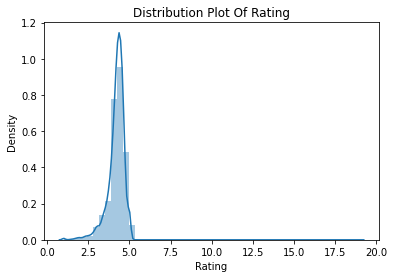

In [22]:
#Distribution Plot Of Rating
sns.distplot(play_store_data.Rating.dropna())
plt.title('Distribution Plot Of Rating')

In [23]:
#median of rating
play_store_data.Rating.dropna().median()

4.3

In [24]:
#Fill NaN Values in Rating Column with Median
play_store_data['Rating'] = play_store_data['Rating'].fillna(play_store_data['Rating'].median())

In [25]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Current Ver       8
Android Ver       3
Type              1
Content Rating    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Current Ver       0.07
Android Ver       0.03
Type              0.01
Content Rating    0.01
dtype: float64


In [26]:
#Dropping null as they are now negligible 
play_store_data.dropna(inplace=True)

In [27]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


##**Cleaning Data And Making It In Proper Format**

**App**

In [28]:
#looking for duplicate apps if any
play_store_data['App'].value_counts().head().reset_index()

,index,App
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,Candy Crush Saga,7
3,8 Ball Pool,7
4,ESPN,7


In [30]:
#data of one of the duplicate app 
play_store_data[play_store_data['App']=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [31]:
#As all rows have same data, only a slight difference in Reviews, we will delete duplicates 
play_store_data.drop_duplicates(subset=['App'],inplace=True)

**Reviews**

In [32]:
#type of reviews 
type(play_store_data['Reviews'].iloc[0])

str

In [34]:
#converting Reviews type into integer
play_store_data['Reviews'] = pd.to_numeric(play_store_data['Reviews'])
type(play_store_data['Reviews'].iloc[0])

numpy.int64

# **Size**

In [35]:
#size value counts
play_store_data['Size'].value_counts().head()

Varies with device    1226
12M                    181
11M                    181
13M                    177
14M                    176
Name: Size, dtype: int64

In [36]:
play_store_data['Size'].value_counts().tail()

721k    1
430k    1
429k    1
200k    1
619k    1
Name: Size, dtype: int64

In [37]:
#Impute nulls inplace of Varies with device 
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: x.replace('Varies with device', 'NaN'))

In [38]:
#removing M and k from values, also coverting KB into MB 
play_store_data['Size'] =play_store_data['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x )
play_store_data['Size'] = play_store_data['Size'].apply(lambda x: float(x.replace('k', ''))/1000 if 'k' in str(x) else x)

In [39]:
#converting Size type into float
play_store_data['Size'] = play_store_data['Size'].astype(float)

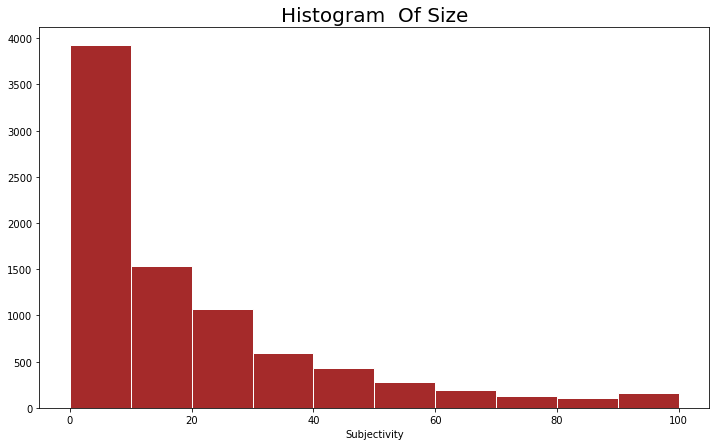

In [40]:
#Histogram Of Size
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Histogram  Of Size",fontsize=20)
plt.hist(play_store_data.Size.dropna(),color="brown",edgecolor="white")
plt.show()

In [41]:
#size median
play_store_data.Size.dropna().median()

12.0

In [42]:
#Fill NaN Values in Size Column with Median
play_store_data['Size'] = play_store_data['Size'].fillna(play_store_data['Size'].median())

**Installs**

In [43]:
#Installs value counts
play_store_data['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [44]:
#Removing + and ,
play_store_data['Installs']=play_store_data['Installs'].apply(lambda x:x.replace('+','') if '+' in str(x) else x) 
play_store_data['Installs']=play_store_data['Installs'].apply(lambda x:x.replace(',','') if ',' in str(x) else x) 

In [45]:
#type of Installs
type(play_store_data.Installs.iloc[0])

str

In [47]:
#converting Installs type into integer
play_store_data['Installs'] = pd.to_numeric(play_store_data['Installs'])

**Price**

In [48]:
#Price value counts
play_store_data['Price'].value_counts().head()

0        8895
$0.99     143
$2.99     124
$1.99      73
$4.99      70
Name: Price, dtype: int64

In [49]:
#removing $ 
play_store_data['Price']=play_store_data['Price'].apply(lambda x:x.replace('$','') if '$' in str(x) else x)

In [50]:
#type of Price
type(play_store_data.Price.iloc[0])

str

In [51]:
#converting Price type into float
play_store_data['Price']=play_store_data['Price'].astype(float)

In [52]:
#checking for null values in data
play_store_data.isna().any().any()

False

In [53]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


#**Analyzing Each Feature Separately**

**Category**

In [54]:
#unique categories
len(play_store_data['Category'].unique())

33

In [55]:
#category-wise counts
category_count=play_store_data['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})
category_count

,Category,Count
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395
5,PRODUCTIVITY,374
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


*Most Of The Apps Belongs To The Family category*

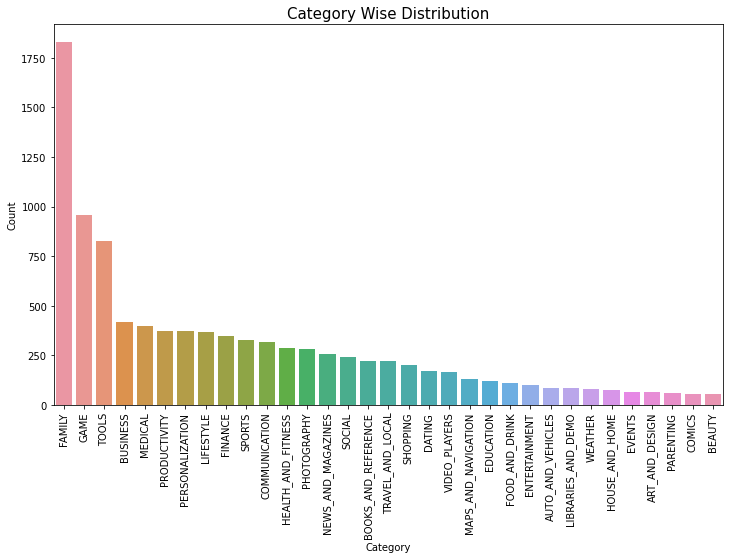

In [56]:
plt.figure(figsize=(12,7))
sns.barplot(x='Category',y='Count',data=category_count)
plt.title('Category Wise Distribution',fontsize=15)
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()

29% Apps Belongs To The Family Category 

**Top 10 categories**

In [58]:
Top10_categories=play_store_data['Category'].value_counts().reset_index().head(10)
Top10_categories.rename(columns={'index':'Category','Category':'Count'},inplace=True)
Top10_categories

,Category,Count
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395
5,PRODUCTIVITY,374
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 10 Categories Count')

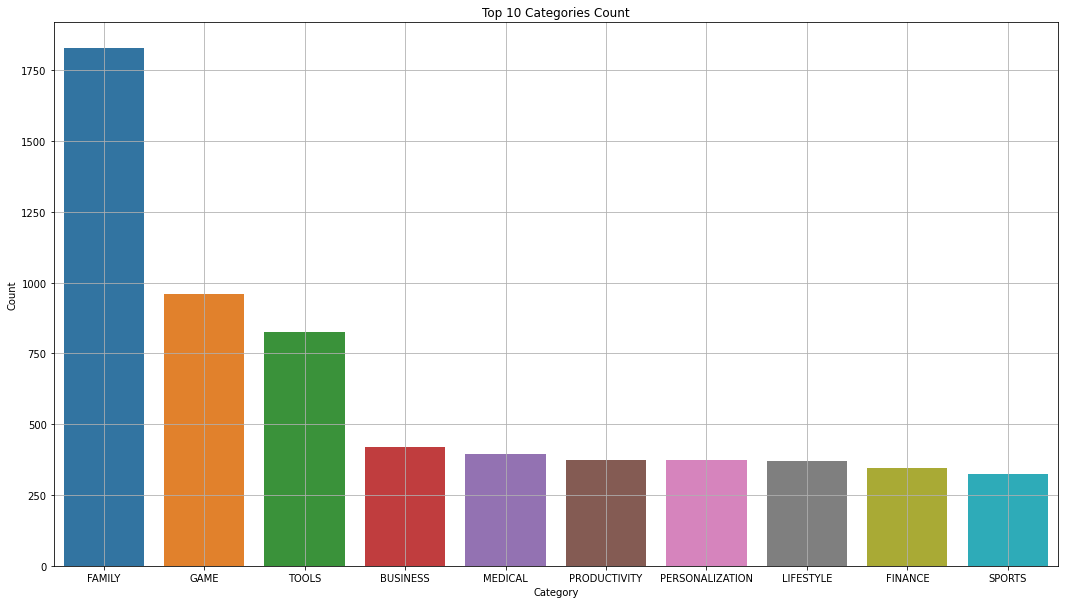

In [59]:
#Top 10 Categories Count
plt.rcParams['figure.figsize'] = (18, 10)
sns.barplot(Top10_categories['Category'],Top10_categories['Count'])
plt.grid()
plt.title('Top 10 Categories Count')

**Top 10 categories distribution**

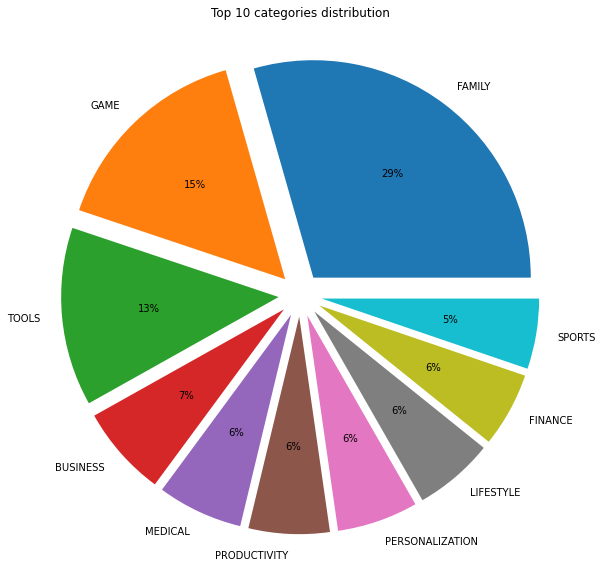

In [60]:
plt.pie(Top10_categories['Count'],labels=Top10_categories['Category'],autopct='%.0f%%',explode=[0.1]*10)
plt.title('Top 10 categories distribution')
plt.show()

*Among Top 10 Categories FAmily,Games And Tools Contribute The Most*

**Rating**

In [61]:
#Description of Rating
play_store_data['Rating'].describe()

count    9648.000000
mean        4.192465
std         0.496552
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot Of Rating')

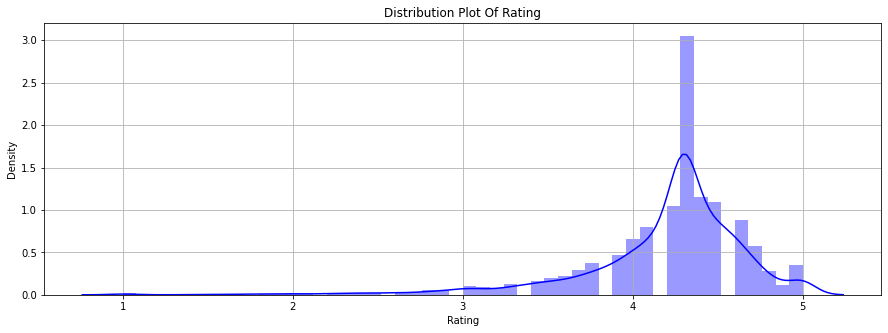

In [62]:
#Distribution Plot Of Rating
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(play_store_data['Rating'],color="blue")
plt.grid()
plt.title('Distribution Plot Of Rating')

Data is negatively skewed with mean rating of 4.19

In [63]:
#Content rating value counts
value_c=play_store_data["Content Rating"].value_counts().reset_index()

Text(0.5, 1.0, 'Barplot of Content Rating Value Counts')

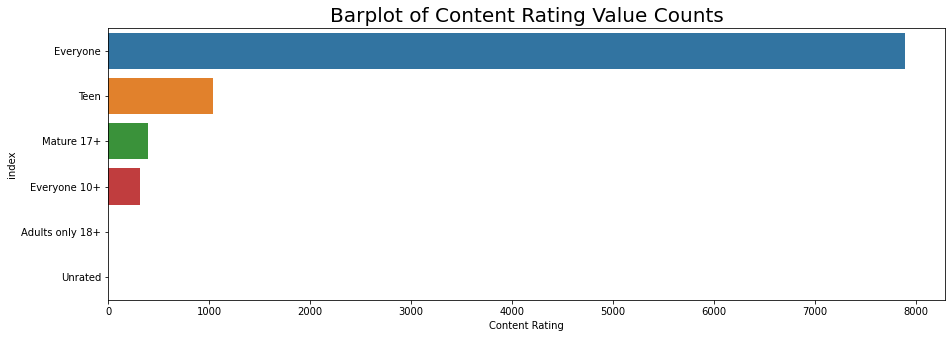

In [64]:
#barplot of content rating value counts
sns.barplot(x="Content Rating",y="index",data=value_c)
plt.title("Barplot of Content Rating Value Counts",fontsize=20)

*Most of The Applications Are Created For Everyone*

**Size**

In [65]:
#Discription Of Size
play_store_data['Size'].describe()

count    9648.000000
mean       19.344761
std        20.590271
min         0.008500
25%         5.300000
50%        12.000000
75%        25.000000
max       100.000000
Name: Size, dtype: float64

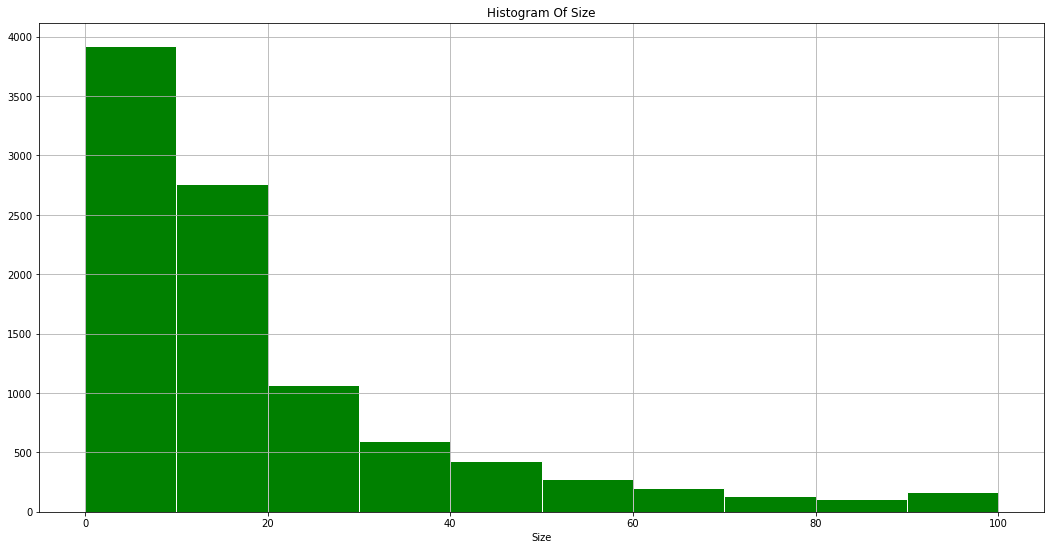

In [66]:
#Histogram Of Size
plt.figure(figsize=(18,9))
plt.xlabel("Size")
plt.title("Histogram Of Size")
plt.hist(play_store_data.Size.dropna(),color="green",edgecolor="white")
plt.grid()
plt.show()

Data is positively skewed with median size of 12 MB and max size of 100 MB

**Price**

In [69]:
#Discription of feature Price
play_store_data['Price'].describe()

count    9648.000000
mean        1.100193
std        16.861727
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [70]:
#Price value counts
price_count= play_store_data['Price'].value_counts().reset_index()
price_count.rename(columns={'index':'Price','Price':'Count'},inplace=True)
price_count.head()

,Price,Count
0,0.00,8895
1,0.99,143
2,2.99,124
3,1.99,73
4,4.99,70


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot Of Price')

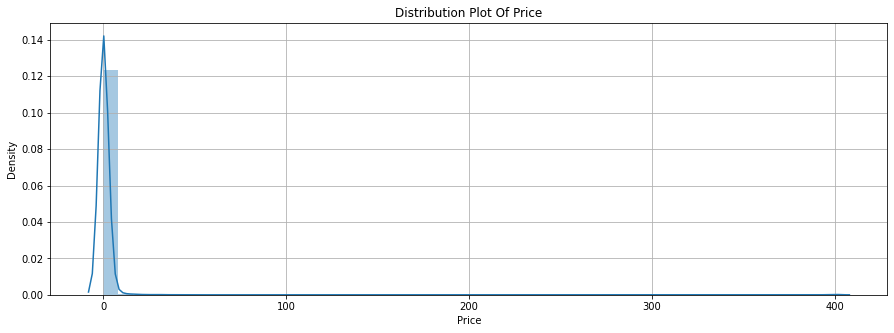

In [71]:
#Distribution Plot Of Price
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(play_store_data['Price'])
plt.grid()
plt.title("Distribution Plot Of Price")

In [72]:
#price type dataframe
dft=play_store_data['Type'].value_counts().reset_index()

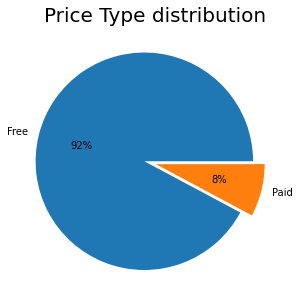

In [73]:
#Price Type distribution
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(dft['Type'],labels=dft['index'],autopct='%.0f%%',explode=[0.1,0.01])
plt.title('Price Type distribution',fontsize=20)
plt.show()

*  Data is positively skewed with mean price of 1, max price of 400.
*  Approximately 92% apps are free.

**Genres**

In [75]:
#Genres Value Counts
genres_count=play_store_data['Genres'].value_counts().reset_index()
genres_count.rename(columns={'index':'Genres','Genres':'count'},inplace=True)
genres_count.head(10)

,Genres,count
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395
5,Productivity,374
6,Personalization,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


In [76]:
#Top 15 Genres
Top_15_genres=genres_count.head(15)
Top_15_genres

,Genres,count
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395
5,Productivity,374
6,Personalization,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bar Plot Of Top 15 Genres Count')

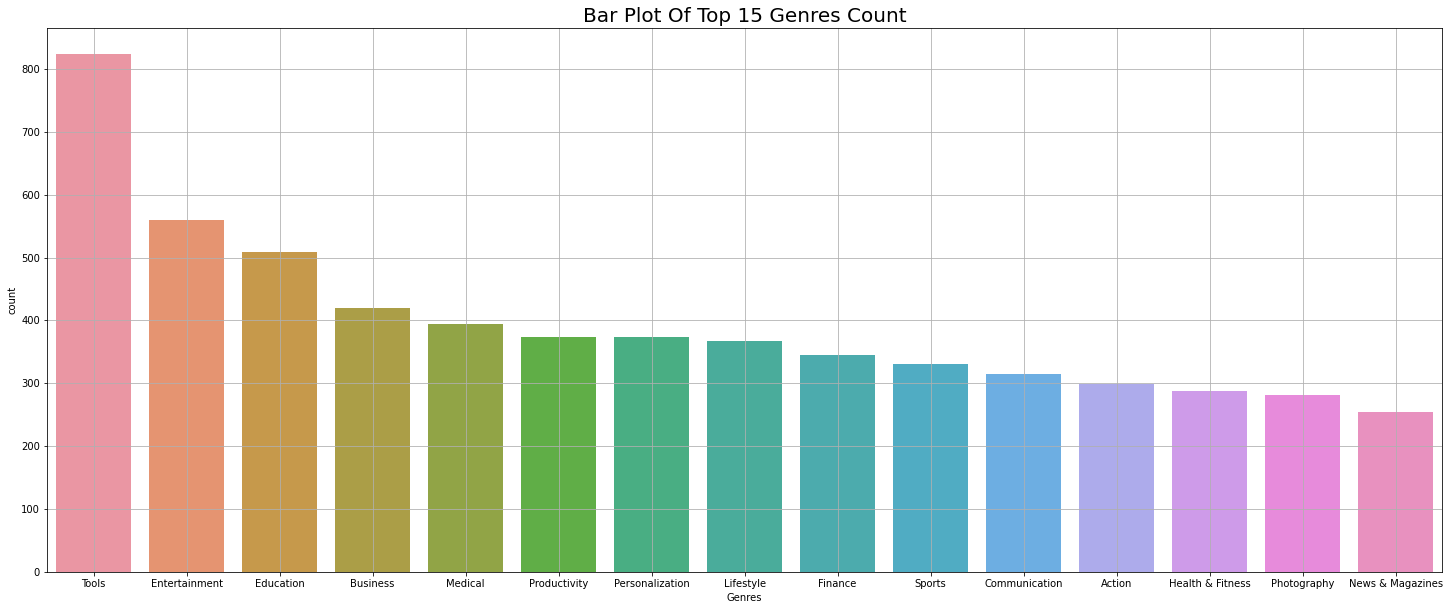

In [77]:
#Bar Plot Of Top 15 Genres Count
plt.rcParams['figure.figsize'] = (25, 10)
sns.barplot(Top_15_genres['Genres'],Top_15_genres['count'])
plt.grid()
plt.title('Bar Plot Of Top 15 Genres Count',fontsize=20)

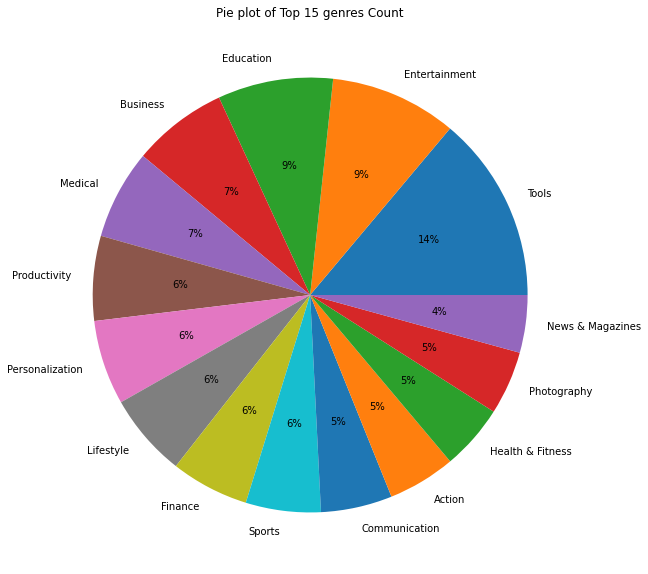

In [78]:
#Pie plot of Top 15 genres Count
plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(Top_15_genres['count'],labels=Top_15_genres['Genres'],autopct='%.0f%%')
plt.title('Pie plot of Top 15 genres Count')
plt.grid()
plt.show()

*Tools is the most used genre in apps.*

Tools is the most used genre in apps

##**Analysis On How Diiferent Features Impacted On Apps**

**Top 50 Install Apps**

In [79]:
#Installs value counts
play_store_data['Installs'].value_counts().tail()

5             82
1             67
500000000     24
1000000000    20
0             14
Name: Installs, dtype: int64

In [80]:
#Top 50 installs apps
Top50_installs_apps=play_store_data.sort_values(by=['Installs'], ascending =False).head(50)
Top50_installs_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,12.0,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,12.0,1000000000,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,12.0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,12.0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,12.0,1000000000,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,12.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306,12.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,12.0,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,12.0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device


**Categories of Top 50 Install App's**

In [81]:
#Categories of Top 50 Install App's
category_of_Top50_installs_apps=Top50_installs_apps['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})
category_of_Top50_installs_apps

,Category,Count
0,COMMUNICATION,11
1,GAME,8
2,TOOLS,7
3,SOCIAL,6
4,PRODUCTIVITY,5
5,NEWS_AND_MAGAZINES,3
6,VIDEO_PLAYERS,3
7,TRAVEL_AND_LOCAL,2
8,BOOKS_AND_REFERENCE,1
9,PHOTOGRAPHY,1


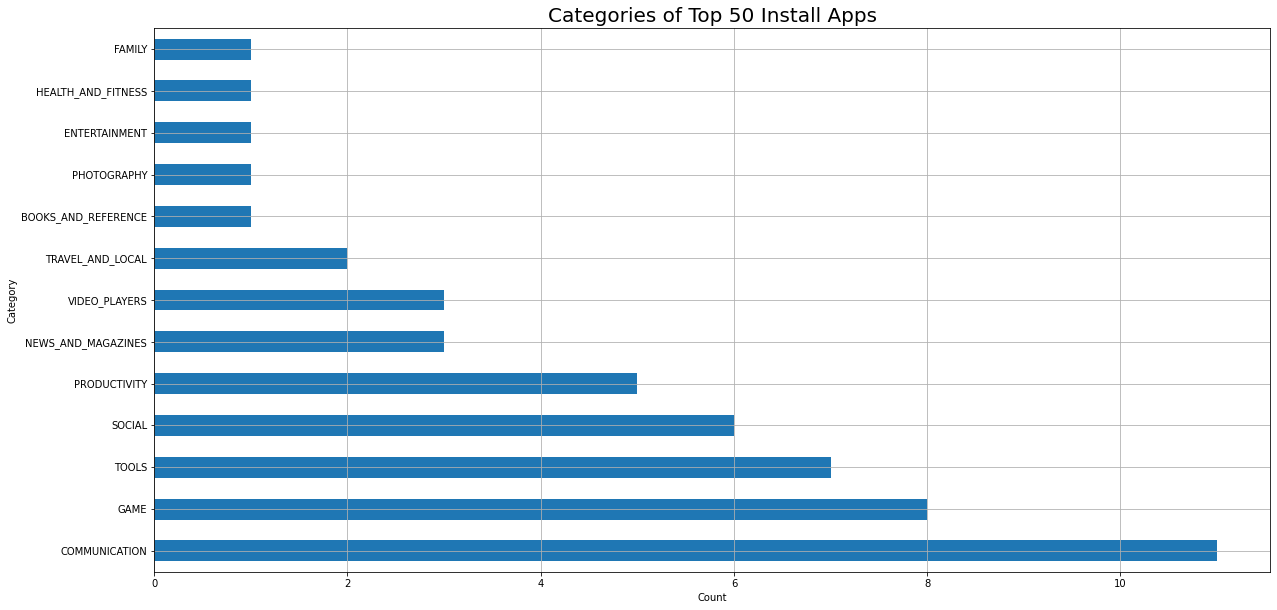

In [82]:
#Categories of Top 50 Install Apps
Top50_installs_apps['Category'].value_counts().plot(kind="barh")
plt.title("Categories of Top 50 Install Apps",fontsize=20)
plt.ylabel("Category")
plt.xlabel("Count")
plt.grid()

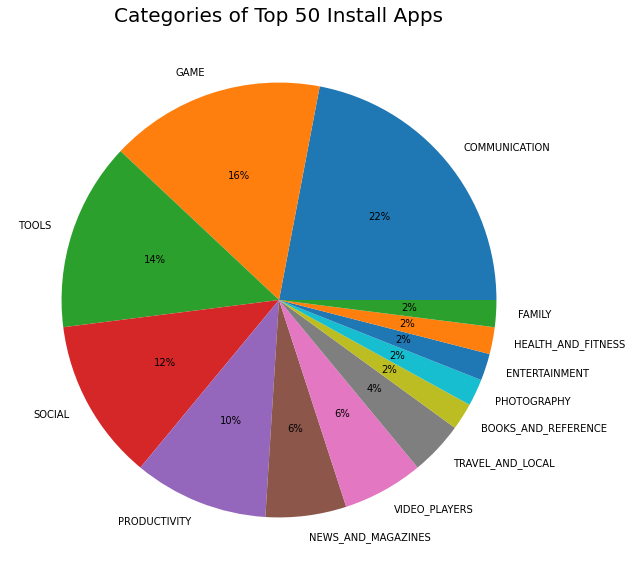

In [83]:
#Categories of Top 50 Install Apps
plt.rcParams['figure.figsize'] = (10,10)
plt.pie(category_of_Top50_installs_apps['Count'],labels=category_of_Top50_installs_apps['Category'],autopct='%.0f%%')
plt.title('Categories of Top 50 Install Apps',fontsize=20)
plt.show()

*Among Top 50 install apps 22% belongs to the communication category and 16% belongs to the Game category.*

**Category And Rating**

In [84]:
#Top 5 Categories by mean rating
Category_by_mean_rating=play_store_data.groupby('Category')['Rating'].mean().reset_index(name="Mean Rating").sort_values(by=['Mean Rating'], ascending =False)
Category_by_mean_rating.head(5)

,Category,Mean Rating
10,EVENTS,4.395313
0,ART_AND_DESIGN,4.373016
8,EDUCATION,4.363866
3,BOOKS_AND_REFERENCE,4.334389
23,PERSONALIZATION,4.324866


[link text](https://)*Events Is Top Category By Mean Rating*

**Category And Installs**

In [85]:
Top5_Category_by_no_of_install=play_store_data.groupby('Category')['Installs'].sum().reset_index(name="Total Installs").sort_values(by=['Total Installs'], ascending =False).head(5)
Top5_Category_by_no_of_install

,Category,Total Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001271905
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902


*Game Is The Category Having Maximum Installs*

**Genres And Installs**

In [86]:
Top5_genres_by_no_of_install=play_store_data.groupby('Genres')['Installs'].sum().reset_index(name="Total Installs").sort_values(by=['Total Installs'], ascending =False).head(5)
Top5_genres_by_no_of_install

,Genres,Total Installs
35,Communication,11038276251
107,Tools,7991271905
81,Productivity,5793091369
100,Social,5487867902
80,Photography,4649147655


*Communication Is The Genres Having Maximum Installs*

**Mean Rating of Top 5 Categories By No. Of Installs**

In [87]:
#Mean Rating of Top 5 Categories By No. Of Installs
mean_rating_of_top5_categories_by_no_of_installs=pd.merge(Top5_Category_by_no_of_install, Category_by_mean_rating , on='Category')
mean_rating_of_top5_categories_by_no_of_installs

,Category,Total Installs,Mean Rating
0,GAME,13878924415,4.249948
1,COMMUNICATION,11038276251,4.154921
2,TOOLS,8001271905,4.073455
3,PRODUCTIVITY,5793091369,4.206150
4,SOCIAL,5487867902,4.255230


**Category And** **Price**

In [88]:
#Category by mean price
Category_by_mean_price=play_store_data.groupby('Category')['Price'].mean().reset_index(name="Mean Price").sort_values(by=['Mean Price'], ascending =False)
Category_by_mean_price.head(5)

,Category,Mean Price
12,FINANCE,8.408203
18,LIFESTYLE,6.398022
20,MEDICAL,2.520759
10,EVENTS,1.718594
11,FAMILY,1.312292


*Finance Is The Category Having Highest Mean Price*

**Mean Price And Mean Rating of Top 5 Categories By No. Of Installs**

In [90]:
#Mean Price And Mean Rating of Top 5 Categories By No. Of Installs
mean_price_of_top5_categories_by_no_of_installs=pd.merge(mean_rating_of_top5_categories_by_no_of_installs,Category_by_mean_price, on='Category')
mean_price_of_top5_categories_by_no_of_installs

,Category,Total Installs,Mean Rating,Mean Price
0,GAME,13878924415,4.249948,0.296465
1,COMMUNICATION,11038276251,4.154921,0.263937
2,TOOLS,8001271905,4.073455,0.322739
3,PRODUCTIVITY,5793091369,4.206150,0.670936
4,SOCIAL,5487867902,4.255230,0.066820


**Top 50 App's by Price**

In [91]:
#Top50_apps_by_price
Top50_apps_by_price= play_store_data.sort_values(by=['Price'],ascending=False).head(50)
Top50_apps_by_price

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5369,I am Rich,FINANCE,4.3,180,3.800,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.700,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40.000,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.700,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up


**Category Distribution Of Top 50 App's By Price**

In [92]:
#Category Distribution Of Top 50 App's By Price
Top50_apps_by_price['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})

,Category,Count
0,MEDICAL,12
1,FINANCE,10
2,FAMILY,10
3,LIFESTYLE,7
4,BUSINESS,3
5,PHOTOGRAPHY,2
6,PRODUCTIVITY,1
7,EVENTS,1
8,SPORTS,1
9,TOOLS,1


*Among Top 50 Apps By Price, Category Of Medical,Finance And Family Contribute The Most*  

**Count Of Apps Of Free And Paid Categories**

In [93]:
#Count_of_free_and_paid_categories Apps
no_of_apps_of_free_and_paid_categories= play_store_data.groupby(['Category','Type'])['App'].count().reset_index().rename(columns={'App':'Count','index':'App'})
no_of_apps_of_free_and_paid_categories.head(10)

,Category,Type,Count
0,ART_AND_DESIGN,Free,60
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
5,BOOKS_AND_REFERENCE,Free,193
6,BOOKS_AND_REFERENCE,Paid,28
7,BUSINESS,Free,408
8,BUSINESS,Paid,12
9,COMICS,Free,56


In [94]:
no_of_apps_of_free_and_paid_categories[no_of_apps_of_free_and_paid_categories['Type']=='Paid'].sort_values(by=['Count'],ascending=False)


,Category,Type,Count
21,FAMILY,Paid,182
38,MEDICAL,Paid,83
27,GAME,Paid,82
44,PERSONALIZATION,Paid,80
56,TOOLS,Paid,77
6,BOOKS_AND_REFERENCE,Paid,28
48,PRODUCTIVITY,Paid,28
11,COMMUNICATION,Paid,27
54,SPORTS,Paid,24
34,LIFESTYLE,Paid,19


*Family Category Have The Highest No. Of Paid Apps*

**No. Of Install's Of Free And Paid Categories**

In [95]:
#No. Of Install's Of Free And Paid Categories
no_of_installs_of_free_and_paid_categories= play_store_data.groupby(['Category','Type'])['Installs'].sum().reset_index().rename(columns={'App':'Count','index':'App'})
no_of_installs_of_free_and_paid_categories['Installs1']=np.log2(no_of_installs_of_free_and_paid_categories['Installs'])

Text(0.5, 1.0, "No. Of Install's Of Free And Paid Categories")

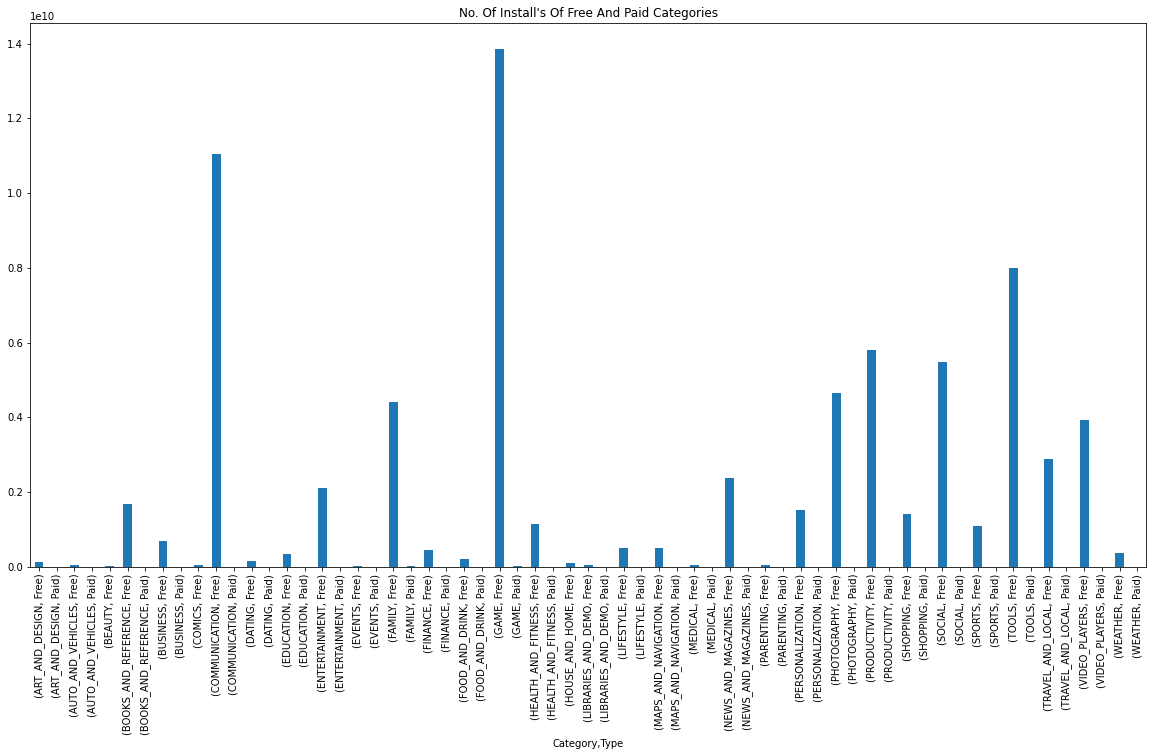

In [96]:
#No. Of Install's Of Free And Paid Categories
plt.figure(figsize = (20,10))
play_store_data.groupby(['Category','Type'])['Installs'].sum().plot(kind="bar")
plt.title("No. Of Install's Of Free And Paid Categories")

In [97]:
#Category And No. Of Paid Install Apps
sorteddf=no_of_installs_of_free_and_paid_categories[no_of_installs_of_free_and_paid_categories['Type']=='Paid'].sort_values(by=['Installs'],ascending=False)
sorteddf

,Category,Type,Installs,Installs1
27,GAME,Paid,20999965,24.323884
21,FAMILY,Paid,20599814,24.296128
44,PERSONALIZATION,Paid,3257794,21.635464
46,PHOTOGRAPHY,Paid,1878740,20.841334
56,TOOLS,Paid,1727431,20.720197
48,PRODUCTIVITY,Paid,1412055,20.429365
11,COMMUNICATION,Paid,1360050,20.375228
54,SPORTS,Paid,1243815,20.246340
34,LIFESTYLE,Paid,1179110,20.169267
62,WEATHER,Paid,812000,19.631120


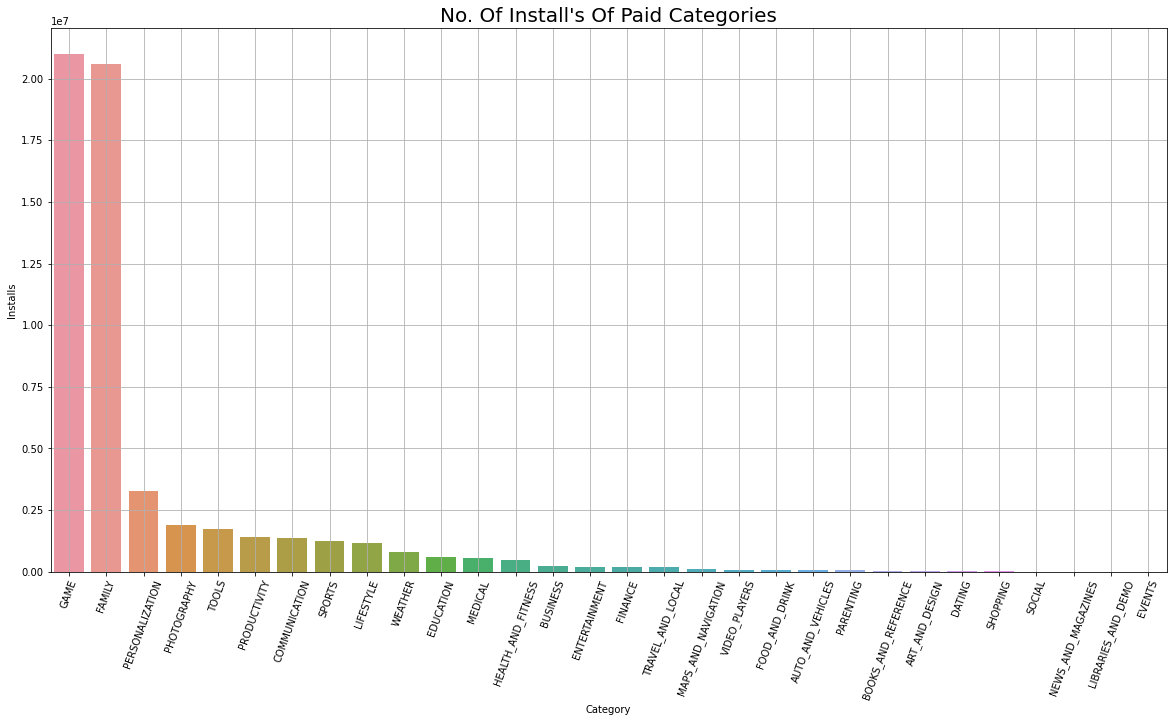

In [98]:
#No. Of Install's  Paid Categories
plt.figure(figsize = (20,10))
sns.barplot(x="Category", y="Installs", data=sorteddf)
plt.title("No. Of Install's Of Paid Categories",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

*Game And Family Category Have The Highest No. Of Installs Of Paid Apps*

**App's With 5 Star Rating**

In [100]:
#App's With 5 Star Rating
five_star_rating_apps=play_store_data[play_store_data['Rating']==5]
five_star_rating_apps['App'].nunique()

271

**Top 10 Categories Of 5 Star Rating App's**

In [101]:
#Top 10 Categories Of 5 Star Rating App's
five_star_rating_apps['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'}).head(10)

,Category,Count
0,FAMILY,67
1,LIFESTYLE,29
2,MEDICAL,25
3,BUSINESS,18
4,TOOLS,17
5,GAME,12
6,HEALTH_AND_FITNESS,12
7,PERSONALIZATION,10
8,SOCIAL,8
9,PRODUCTIVITY,8


*There are 271 apps which have 5 star rating. In which 67 apps belongs to the Family category.*

**Correlation Heatmap**

In [102]:
#Correlation
play_store_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050215,0.037383,0.034310,-0.018673
Reviews,0.050215,1.000000,0.066147,0.625158,-0.007604
Size,0.037383,0.066147,1.000000,0.030467,-0.019590
Installs,0.034310,0.625158,0.030467,1.000000,-0.009413
Price,-0.018673,-0.007604,-0.019590,-0.009413,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

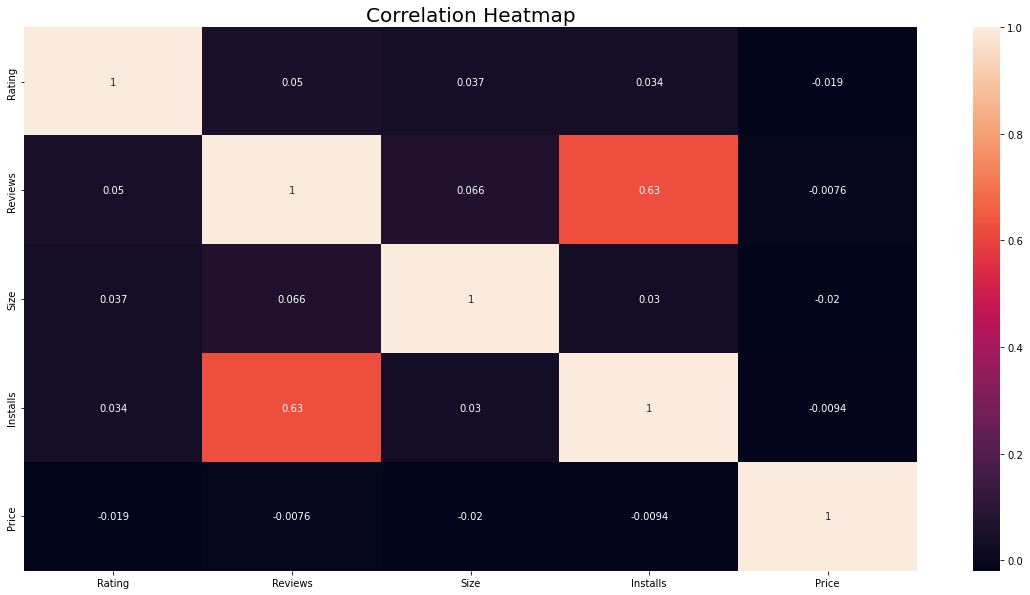

In [103]:
#Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(play_store_data.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

**Regression Plot Of Installs And Reviews**

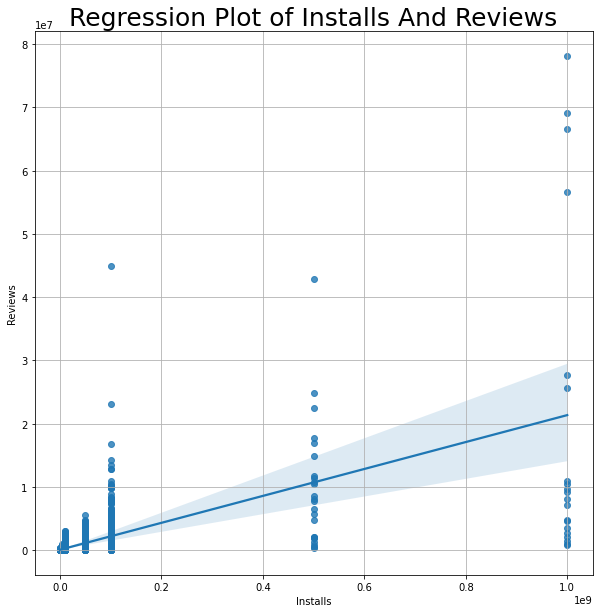

In [104]:
#Regression Plot Of Installs And Reviews
sns.regplot(x="Installs",y="Reviews",data=play_store_data)
plt.title("Regression Plot of Installs And Reviews",fontsize=25)
plt.grid()

**There is some significant amount of positive correlation between Installs and Reviews. This is expected as no. of Installs increases more interactions will happen which leads to increasing no. of Reviews.**

#**Let's Drive Into The User Reviews Data**

In [105]:
#First Look Of User Reviews Data
user_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [106]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


##**Handling missing values**

In [107]:
#data of Translated null values
user_reviews_data[user_reviews_data['Translated_Review'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [109]:
#Dropping Nulls of Translated Review as all other feature values are also null 
user_reviews_data.dropna(subset=['Translated_Review'],inplace=True)

In [110]:
#Checking data after removing nulls
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


#**Combining Both Dataset**

In [111]:
#unique apps is user_reviews_data
user_reviews_data['App'].nunique()

865

In [112]:
#unique apps is play_store_data
play_store_data['App'].nunique()

9648

In [113]:
#Merging both data
combined_data=pd.merge(play_store_data,user_reviews_data, on='App')

In [114]:
#Unique Apps in combined data
combined_data['App'].nunique()

816

In [115]:
#About combined data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  int64  
 4   Size                    35929 non-null  float64
 5   Installs                35929 non-null  int64  
 6   Type                    35929 non-null  object 
 7   Price                   35929 non-null  float64
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Last Updated            35929 non-null  object 
 11  Current Ver             35929 non-null  object 
 12  Android Ver             35929 non-null  object 
 13  Translated_Review       35929 non-null  object 
 14  Sentiment               35929 non-null

In [116]:
#Checking for null in combined data
combined_data.isnull().any().sum()

0

##**Analysis Of Combined Data**

**Translated Reviews**

**Most Frequent Words In Translated Reviews**

In [117]:
#Importing worcloud
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
for val in combined_data.Translated_Review:   
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

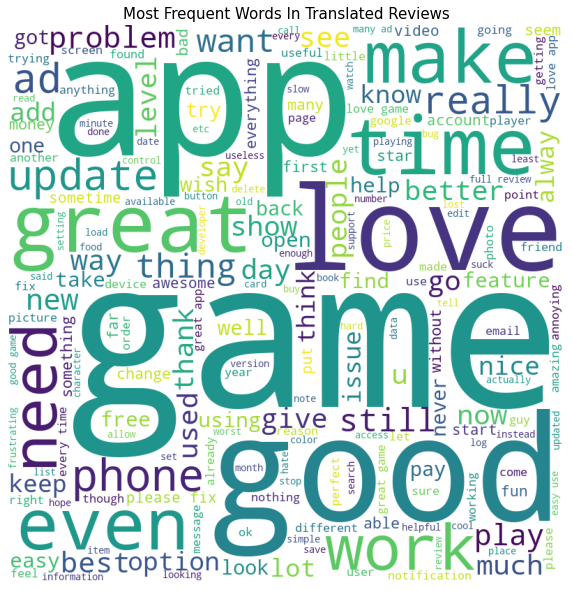

In [119]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Frequent Words In Translated Reviews",fontsize=15)
plt.tight_layout(pad = 0)
plt.show()

**Sentiment**

In [120]:
#Sentiment count
sentiment_count= combined_data.Sentiment.value_counts().reset_index().rename(columns={'index':'Sentiment','Sentiment':'count'})
sentiment_count

,Sentiment,count
0,Positive,23073
1,Negative,8005
2,Neutral,4851


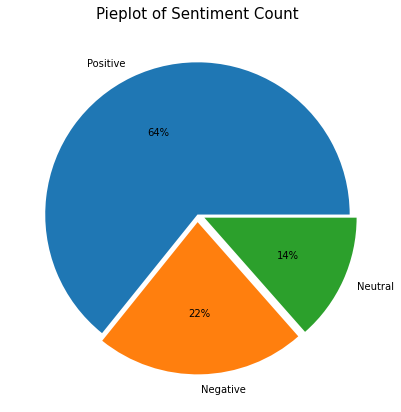

In [121]:
#Pieplot of Sentiment Count
plt.rcParams['figure.figsize'] = (15, 7)
plt.pie(sentiment_count['count'],labels=sentiment_count['Sentiment'],autopct='%.0f%%',explode=(0,0.05,0.05))
plt.title('Pieplot of Sentiment Count',size=15)
plt.show()

In [122]:
#Appwise sentiment count
Appwise_sentiment_count=combined_data.groupby(['App','Sentiment'])['Sentiment'].count().reset_index(name='count')
Appwise_sentiment_count.head()

,App,Sentiment,count
0,10 Best Foods for You,Negative,10
1,10 Best Foods for You,Neutral,22
2,10 Best Foods for You,Positive,162
3,11st,Negative,7
4,11st,Neutral,9


In [123]:
#Top20 apps with most positive sentiment
Top_apps_with_max_sentiment=Appwise_sentiment_count.sort_values(by="count",ascending=False)
Top20_apps_with_most_positive_sentiment=Top_apps_with_max_sentiment[Top_apps_with_max_sentiment['Sentiment']=='Positive'].head(20)
Top20_apps_with_most_positive_sentiment

,App,Sentiment,count
2115,Helix Jump,Positive,209
1279,Duolingo: Learn Languages Free,Positive,200
824,Calorie Counter - Macros,Positive,174
664,Bowmasters,Positive,169
827,Calorie Counter - MyFitnessPal,Positive,169
2,10 Best Foods for You,Positive,162
1951,Google Photos,Positive,143
54,8fit Workouts & Meal Planner,Positive,137
1845,Garena Free Fire,Positive,136
1103,DRAGON BALL LEGENDS,Positive,127


*Helix Jump App Have The Most Positive Sentiment Count*

**Categories of Top20 Apps With Most Positive Sentiment**

In [124]:
#merging 2 dataset Top20_apps_with_most_positive_sentiment  and combined_data
d1=pd.merge(Top20_apps_with_most_positive_sentiment,combined_data, on='App')
categories_of_Top20_apps_with_most_positive_sentiment=d1[['App','Sentiment_x','count','Category']]
d2=categories_of_Top20_apps_with_most_positive_sentiment.groupby(['App','Sentiment_x','Category'])['count'].mean().reset_index(name='count')
d2['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'})

,Category,Count
0,GAME,8
1,HEALTH_AND_FITNESS,6
2,PRODUCTIVITY,2
3,SPORTS,1
4,ENTERTAINMENT,1
5,EDUCATION,1
6,PHOTOGRAPHY,1


*Gaming Category Apps Are The Most Among Top 20 Apps with Most Positive Sentiment*

**Categoriwise Sentiment Count**

In [125]:
#Categoriwise Sentiment Count
categoriwise_sentiment_count=combined_data.groupby(['Category','Sentiment'])['Sentiment'].count().reset_index(name='count')
categoriwise_sentiment_count

,Category,Sentiment,count
0,ART_AND_DESIGN,Negative,61
1,ART_AND_DESIGN,Neutral,62
2,ART_AND_DESIGN,Positive,259
3,AUTO_AND_VEHICLES,Negative,17
4,AUTO_AND_VEHICLES,Neutral,36
...,...,...,...
94,VIDEO_PLAYERS,Neutral,58
95,VIDEO_PLAYERS,Positive,190
96,WEATHER,Negative,28
97,WEATHER,Neutral,31


Text(0.5, 1.0, 'Category-wise sentiment count')

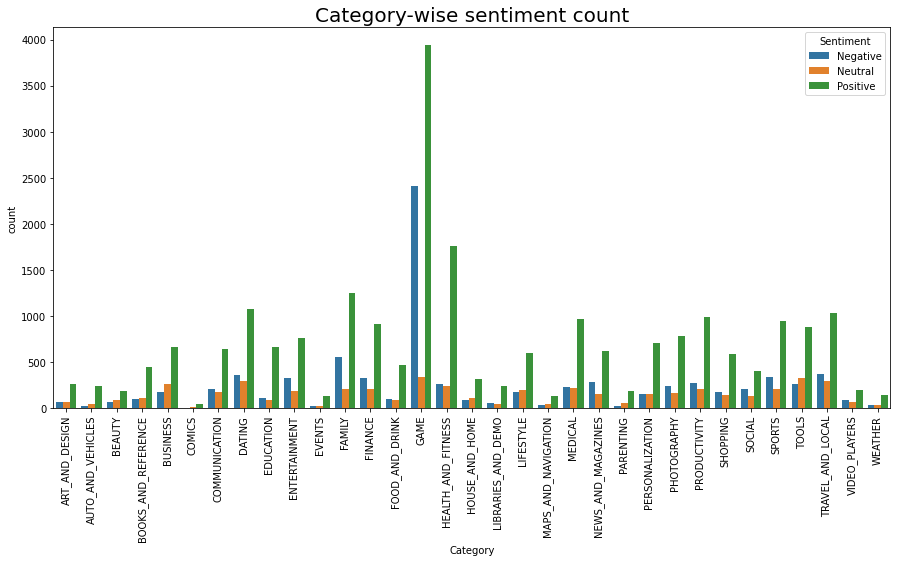

In [126]:
#Barplot of categoriwise_sentiment_count
sns.barplot(x="Category", y="count", hue="Sentiment", data=categoriwise_sentiment_count)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Category-wise sentiment count",fontsize=20)

In [127]:
#Sorting data of categoriwise_sentiment_count
categoriwise_sentiment_count.sort_values(by=['count'],ascending=False)

,Category,Sentiment,count
44,GAME,Positive,3936
42,GAME,Negative,2408
47,HEALTH_AND_FITNESS,Positive,1754
35,FAMILY,Positive,1249
23,DATING,Positive,1068
...,...,...,...
31,EVENTS,Neutral,17
3,AUTO_AND_VEHICLES,Negative,17
30,EVENTS,Negative,16
16,COMICS,Neutral,5


*Game Category Has The Most Positive Sentiment Count*

**Sentiment Polarity**

In [128]:
#Description Of Sentiment_Polarity
combined_data['Sentiment_Polarity'].describe()

count    35929.000000
mean         0.180904
std          0.350080
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

In [129]:
#Skewness of Sentiment_Polarity
combined_data['Sentiment_Polarity'].skew()

-0.10633599216001281

In [130]:
#appwise_mean_sentiment_polarity
appwise_mean_sentiment_polarity=combined_data.groupby(['App'])['Sentiment_Polarity'].mean().reset_index()
appwise_mean_sentiment_polarity.head()

,App,Sentiment_Polarity
0,10 Best Foods for You,0.470733
1,11st,0.185943
2,1800 Contacts - Lens Store,0.318145
3,1LINE – One Line with One Touch,0.196290
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.449566


In [131]:
#Top20_apps_with_maximum_mean_sentiment_polarity
Top20_apps_with_maximum_mean_sentiment_polarity=appwise_mean_sentiment_polarity.sort_values(by="Sentiment_Polarity",ascending=False).head(20)
Top20_apps_with_maximum_mean_sentiment_polarity

,App,Sentiment_Polarity
797,HomeWork,1.000000
708,Google Slides,0.933333
404,Daily Workouts - Exercise Fitness Routine Trainer,0.800000
201,Bed Time Fan - White Noise Sleep Sounds,0.781250
304,Cameringo Lite. Filters Camera,0.770269
707,Google Primer,0.750000
652,GPS Map Free,0.700000
653,GPS Speedometer and Odometer,0.687500
204,Best Ovulation Tracker Fertility Calendar App ...,0.595313
12,3D Live Neon Weed Launcher,0.568182


**Category Wise Mean Sentiment Polarity**

In [132]:
#category_wise_mean_sentiment_polarity
category_wise_mean_sentiment_polarity=combined_data.groupby(['Category'])['Sentiment_Polarity'].mean().reset_index()
category_wise_mean_sentiment_polarity.head()

,Category,Sentiment_Polarity
0,ART_AND_DESIGN,0.234735
1,AUTO_AND_VEHICLES,0.348683
2,BEAUTY,0.193360
3,BOOKS_AND_REFERENCE,0.248422
4,BUSINESS,0.232189


In [133]:
#sorting category_wise_mean_sentiment_polarity
category_wise_mean_sentiment_polarity.sort_values(by="Sentiment_Polarity",ascending=False).head(10)

,Category,Sentiment_Polarity
5,COMICS,0.449810
10,EVENTS,0.377933
1,AUTO_AND_VEHICLES,0.348683
22,PARENTING,0.318880
32,WEATHER,0.294978
15,HEALTH_AND_FITNESS,0.290823
8,EDUCATION,0.279332
23,PERSONALIZATION,0.278490
19,MAPS_AND_NAVIGATION,0.267218
13,FOOD_AND_DRINK,0.266882


*Comics Category Has The Highest Mean Sentiment Polarity*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


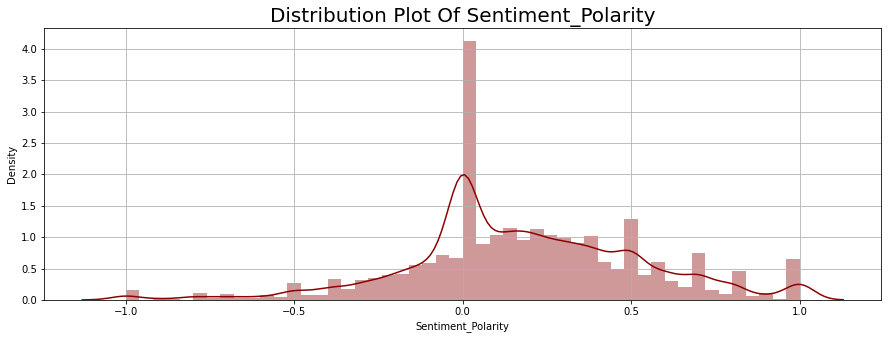

In [134]:
#Distribution Plot Of Sentiment_Polarity
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(combined_data['Sentiment_Polarity'],color="darkred")
plt.title('Distribution Plot Of Sentiment_Polarity',fontsize=20)
plt.grid()

**Sentiment Subjectivity**

In [135]:
#Description Of Sentiment_Subjectivity
combined_data['Sentiment_Subjectivity'].describe()

count    35929.000000
mean         0.493767
std          0.258053
min          0.000000
25%          0.361111
50%          0.514835
75%          0.650000
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

In [136]:
#Skewness of Sentiment_Subjectivity
combined_data['Sentiment_Subjectivity'].skew()

-0.31108162534793066

In [137]:
#category_wise_sentiment_Subjectivity
category_wise_sentiment_Subjectivity=combined_data.groupby(['Category'])['Sentiment_Subjectivity'].mean().reset_index()
category_wise_sentiment_Subjectivity.head()

,Category,Sentiment_Subjectivity
0,ART_AND_DESIGN,0.537098
1,AUTO_AND_VEHICLES,0.529918
2,BEAUTY,0.494510
3,BOOKS_AND_REFERENCE,0.476268
4,BUSINESS,0.444924


In [138]:
#sorting category_wise_sentiment_Subjectivity
category_wise_sentiment_Subjectivity.sort_values(by="Sentiment_Subjectivity",ascending=False).head(10)

,Category,Sentiment_Subjectivity
10,EVENTS,0.576808
5,COMICS,0.570933
0,ART_AND_DESIGN,0.537098
1,AUTO_AND_VEHICLES,0.529918
23,PERSONALIZATION,0.529779
17,LIBRARIES_AND_DEMO,0.525975
13,FOOD_AND_DRINK,0.520081
15,HEALTH_AND_FITNESS,0.512013
7,DATING,0.510476
11,FAMILY,0.509036


*Category Of Events And Comics Have The Maximum Mean Sentiment Subjectivity*

In [139]:
combined_data['Sentiment_Subjectivity'].describe()

count    35929.000000
mean         0.493767
std          0.258053
min          0.000000
25%          0.361111
50%          0.514835
75%          0.650000
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

Text(0.5, 1.0, 'Distribution Plot Of Sentiment_Subjectivity')

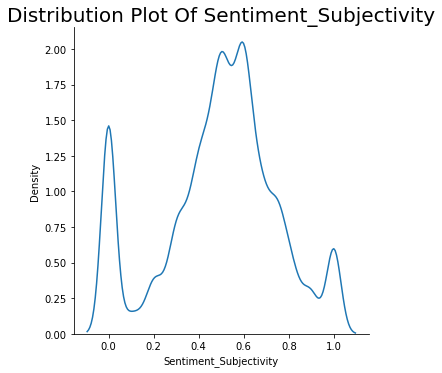

In [140]:
#Distribution Plot Of Sentiment_Subjectivity
plt.rcParams['figure.figsize'] = (15, 5)
sns.displot(combined_data, x='Sentiment_Subjectivity', kind="kde")
plt.title('Distribution Plot Of Sentiment_Subjectivity',fontsize=20)

#**Conclusion**

*   Most of the app's belongs to Family category. They are approximately 19% among all categories.

*   Ratings are negatively skewed with mean rating of 4.19

*   Sizes are positively skewed with median size of 12 MB.

*  Prices are positively skewed with mean price of 1,median price of 0 and max price of 400.

*  Most of The Applications Are Created For Everyone

*  Approximately 92% apps are free.

*  Tools, Entertainment and Education are the top 3 genres.

*  Approximately 64% sentiments are positive, 22% are negative and 14% are neutral.

*  Mean Sentiment Polarity is 0.180904

*  Mean Sentiment Subjectivity is 0.493767

*  There are 271 apps which have 5 star rating. In which 67 apps belongs to the Family category.


*   Among Top 50 install apps 22% belongs to the communication category and 16% belongs to the Game category.

*   Events category have the maximum mean rating of 4.395313

*   Genres of Communication, Tools, Productivity and Social have the maximum no. of installs.

*   Apps belonging to Finance category have the highest mean price (8.408203)  among all categories.

*   Family category has the highest no. of paid apps.

* Game And Family Category Have The Highest No. Of Installs Of Paid Apps.

*   Installs are positively correlated with reviews with correlation value of 0.63

